NB! Этот файл должен находиться в папке со всеми файлами, которые мы рассматриваем

In [231]:
import nltk
from nltk.tokenize import word_tokenize
import re
import collections
from collections import Counter

Устанавливаем всё необходимое для лемматизации токенов:

In [230]:
import cltk
from cltk.stem.lemma import LemmaReplacer
from cltk.corpus.utils.importer import CorpusImporter
corpus_importer = CorpusImporter('latin')
corpus_importer.import_corpus('latin_models_cltk')
lemmatizer = LemmaReplacer('latin')

#### Отдельно рассмотрим этот текст, там больше всего нужно чистить

In [370]:
with open('calpurniusS.txt', encoding='utf-8') as f:
    text = f.read()

In [371]:
text_clean = re.sub(r'[A-Z][A-Z]+\W', '', text)#чистим текст от слов, написанных капсом
text_clean_2 = re.sub(r'([IV].+\n)', '', text_clean)#убираем строки с номером глав и действующими лицами

line_split = text_clean_2.split('\n')#делим полученный текст на строчки

new_lines = []
for line in line_split:
    new_line = re.sub(r'([A-Z][a-z]+\b\s)?', '', line, count = 1)#удаляем имя говорящего из некоторых строк
    new_lines.append(new_line.lower())#приводим к нижнему регистру

#### Получаем строчку с первыми буквами для этого произведения

In [135]:
first_letters_calpurniusS = ''
for line in new_lines:
    first_letters_calpurniusS = first_letters_calpurniusS + line[:1]#добавляем первую букву каждой строки в отдельную строчку
print(first_letters_calpurniusS)

nqecmnthisbpqdppnmesqasocnpnsnmqqhlvvscnaaeaspiesdoicqqpoincipaaapiinaireevcfpnsaisfuncomscdfdvacpieaecpaedaocdieisepniieeaitqpniaiecnapelhdhuafirsnmrntpsqpsssvsamcmdonfaicshieeevenisnaqmantetshnipeihudiinaevvsfeehddnnutnaeidoaavqdspqqestqtsueahsmcdaqdqvqoihcmaivnqmqqircvsqddnqancrhqildfidnqphnsctthepelupdsainrissevnaacmqechmmipaqeefstqheicdtaaplmrqlcrcacsenauehesdaidclvmnrsepfnnipuuqsgetdatestmhvrcvtqondpiafsteotrpnenimtctqcpchaiaasepiptpttsqpsinocafimpdntshfnndbianiqefeaaeivirnqccshacmsdftrapevpsaiandaleosumnqeinndhphgneiitvcivepsupsfasciiinavnsavceqotivdrfeseamqncqscacalaciedhptanvnteutheipsgnrssdispnnatadnraddmhofeqsaellnuoqcmceqnisavnogddqasevinaqeiseqppcciasefvvbcpseierdsohhvdibncssqaveaoiinfdovpole


In [194]:
tokens = []
new_tokens = []
for line in new_lines:
    tokens.extend(word_tokenize(line))#токенизируем текст с помощью nltk
for token in tokens:
    if token.isalpha():#оставляем только буквенные токены
        new_tokens.append(token)
print(new_tokens[:100])

['nondum', 'solis', 'equos', 'declinis', 'mitigat', 'aestas', 'quamvis', 'et', 'madidis', 'incumbant', 'prela', 'racemis', 'et', 'spument', 'rauco', 'ferventia', 'musta', 'susurro', 'cernis', 'ut', 'ecce', 'pater', 'quas', 'tradidit', 'ornyte', 'vaccae', 'molle', 'sub', 'hirsuta', 'latus', 'explicuere', 'genista', 'nos', 'quoque', 'vicinis', 'cur', 'non', 'succedimus', 'umbris', 'torrida', 'cur', 'solo', 'defendimus', 'ora', 'galero', 'hoc', 'potius', 'frater', 'corydon', 'nemus', 'antra', 'petamus', 'ista', 'patris', 'fauni', 'graciles', 'ubi', 'pinea', 'denset', 'silva', 'comas', 'rapidoque', 'caput', 'levat', 'obvia', 'soli', 'bullantes', 'ubi', 'fagus', 'aquas', 'radice', 'sub', 'ipsa', 'protegit', 'et', 'ramis', 'errantibus', 'implicat', 'umbras', 'quo', 'me', 'cumque', 'vocas', 'sequor', 'ornyte', 'nam', 'mea', 'leuce', 'dum', 'negat', 'amplexus', 'nocturnaque', 'gaudia', 'nobis', 'pervia', 'cornigeri', 'fecit', 'sacraria', 'fauni', 'prome']


In [372]:
lemmas = lemmatizer.lemmatize(new_tokens)#лемматизируем токены
print(len(lemmas))

4771


#### Нужен os, чтобы обойти все файлы в папке

In [11]:
import os

#### Создаем список со всеми файлами, которые будем обходить

In [37]:
new_poems = []
poems = os.listdir(path='.')
for i in poems:
    if (i != '.DS_Store') and (i != 'Проект по НИСу латынь.ipynb') and (i != '.ipynb_checkpoints'):
        new_poems.append(i)
print(new_poems)

['cicero_philosophia.txt', 'seneca_philosophia.txt', 'caesar_gallica.txt', 'lucretius.txt', 'nepos.txt', 'calpurniusS.txt', 'appendixV.txt', 'cicero_rhetorica.txt', 'horatius_sat_ep_ap.txt', 'vitruvius.txt', 'ovidius_met.txt', 'tacit_annales.txt', 'apuleius_meta.txt', 'hirtius.txt', 'lucanus.txt', 'suetonius_XII.txt', 'Vergil_Aeneis_Mynors.txt', 'apuleius_apol.txt', 'Vergil_Georg_Mynors.TXT', 'statius.txt', 'cicero_orationes.txt', 'persius.txt', 'herennium.txt', 'Vergil_Bukol_Mynors.TXT', 'bellumAf.txt', 'sallustius.txt', 'juvenalis.txt', 'manilius.txt', 'homerusL.txt', 'caesar_civile.txt', 'siliusI.txt', 'valeriusF.txt', 'catullus1.txt']


#### Функция, которая получает имя файла и уже начатый список с леммами и читает из данного файла леммы, возвращает дополненный список

In [185]:
def lemmas_bag(filename, lemmas):
    with open(filename, encoding='utf-8') as f:
        text_def = f.read()
    text_clean_def = re.sub(r'[A-Z][A-Z]+\W', '', text_def)#чистим текст от слов, написанных капсом
    line_split_def = text_clean_def.split('\n')#делим полученный текст на строчки
    tokens_def = []
    new_tokens_def = []
    for line in line_split_def:
        tokens_def.extend(word_tokenize(line))#токенизируем текст с помощью nltk
    for token in tokens_def:
        if token.isalpha():#оставляем только буквенные токены
            new_tokens_def.append(token.lower())
    lemmas_list = lemmatizer.lemmatize(new_tokens_def)#лемматизируем токены
    return lemmas + lemmas_list

Эта функция выдает размер каждого из рассматриваемых файлов (в целом, она громоздкая и излишляя, это предыдущая функция, у которой я поменяла return; мне просто срочно нужно было достать длину текстов)

In [337]:
def lemmas_bag_special(filename, lemmas):
    with open(filename, encoding='utf-8') as f:
        text_def = f.read()
    text_clean_def = re.sub(r'[A-Z][A-Z]+\W', '', text_def)#чистим текст от слов, написанных капсом
    line_split_def = text_clean_def.split('\n')#делим полученный текст на строчки
    tokens_def = []
    new_tokens_def = []
    for line in line_split_def:
        tokens_def.extend(word_tokenize(line))#токенизируем текст с помощью nltk
    for token in tokens_def:
        if token.isalpha():#оставляем только буквенные токены
            new_tokens_def.append(token.lower())
    lemmas_list = lemmatizer.lemmatize(new_tokens_def)#лемматизируем токены
    return len(lemmas_list)

Проходим этой функцией по всем файлам

In [338]:
for poem in new_poems:
    if (poem != 'calpurniusS.txt'):
        print(poem)
        lemmas = lemmas_bag(poem,lemmas) 
        print(lemmas_bag_special(poem,lemmas))
print(len(lemmas))

cicero_philosophia.txt
280460
seneca_philosophia.txt
295443
caesar_gallica.txt
44653
lucretius.txt
49013
nepos.txt
28220
appendixV.txt
12560
cicero_rhetorica.txt
155055
horatius_sat_ep_ap.txt
27206
vitruvius.txt
57566
ovidius_met.txt
77965
tacit_annales.txt
88562
apuleius_meta.txt
53442
hirtius.txt
6603
lucanus.txt
51010
suetonius_XII.txt
69821
Vergil_Aeneis_Mynors.txt
67115
apuleius_apol.txt
21425
Vergil_Georg_Mynors.TXT
14991
statius.txt
91031
cicero_orationes.txt
413190
persius.txt
4516
herennium.txt
29957
Vergil_Bukol_Mynors.TXT
5735
bellumAf.txt
12916
sallustius.txt
45909
juvenalis.txt
25046
manilius.txt
27487
homerusL.txt
6611
caesar_civile.txt
32245
siliusI.txt
76394
valeriusF.txt
37203
catullus1.txt
2919
4429309


#### Леммы не должны повторяться, для этого делаем словарь и оставляем только ключи

In [235]:
new_lemmas = []#леммы без повторений
x = Counter(lemmas)
for i in x.keys():
    new_lemmas.append(i)
print(len(new_lemmas))
print(new_lemmas[:200])

48433
['nondum', 'solus1', 'equus1', 'declinis', 'mitigo', 'aestas', 'quivis', 'et', 'madidus', 'incumbo', 'prelum', 'racemus', 'spumo', 'raucus', 'ferveo', 'mustus', 'susurro1', 'cerno', 'ut', 'ecce', 'pater', 'qui1', 'trado', 'ornyte', 'vacca1', 'molle', 'sub', 'hirsutus', 'fero', 'explico', 'genesta', 'nos', 'quoque', 'vicinus', 'cur', 'non', 'succedo', 'umbra', 'torridus', 'solo1', 'defendo', 'oro', 'galerus', 'hic', 'potis', 'frater', 'corydon', 'no1', 'antrum', 'peto', 'iste', 'fauni', 'gracilis', 'ubi', 'pineum', 'denset', 'silva', 'como1', 'rapidus', 'caput', 'levo1', 'obvius', 'bullo', 'fagus', 'aqua', 'radix', 'ipse', 'protego', 'ramus', 'erro1', 'implico', 'umbro', 'quis1', 'ego', 'cumque', 'voco', 'sequor', 'nam', 'meo', 'leuce', 'dum', 'nego', 'amplector', 'nocturnus', 'gaudium', 'pervius', 'cornigeri', 'facio', 'sacrarium', 'promo', 'igitur', 'calamus', 'si', 'recondo', 'servo', 'neque', 'tu', 'desum', 'fistula', 'nuper', 'maturo', 'docilis', 'compingo1', 'harundo', 'lado

#### Чистим леммы (всякие циферки убираем с конца)

In [236]:
new_lemmas_final = []
for i in new_lemmas:
    if i.isalpha():
        new_lemmas_final.append(i)
    else:
        new_lemmas_final.append(i[:-1])
print(new_lemmas_final[:200])

['nondum', 'solus', 'equus', 'declinis', 'mitigo', 'aestas', 'quivis', 'et', 'madidus', 'incumbo', 'prelum', 'racemus', 'spumo', 'raucus', 'ferveo', 'mustus', 'susurro', 'cerno', 'ut', 'ecce', 'pater', 'qui', 'trado', 'ornyte', 'vacca', 'molle', 'sub', 'hirsutus', 'fero', 'explico', 'genesta', 'nos', 'quoque', 'vicinus', 'cur', 'non', 'succedo', 'umbra', 'torridus', 'solo', 'defendo', 'oro', 'galerus', 'hic', 'potis', 'frater', 'corydon', 'no', 'antrum', 'peto', 'iste', 'fauni', 'gracilis', 'ubi', 'pineum', 'denset', 'silva', 'como', 'rapidus', 'caput', 'levo', 'obvius', 'bullo', 'fagus', 'aqua', 'radix', 'ipse', 'protego', 'ramus', 'erro', 'implico', 'umbro', 'quis', 'ego', 'cumque', 'voco', 'sequor', 'nam', 'meo', 'leuce', 'dum', 'nego', 'amplector', 'nocturnus', 'gaudium', 'pervius', 'cornigeri', 'facio', 'sacrarium', 'promo', 'igitur', 'calamus', 'si', 'recondo', 'servo', 'neque', 'tu', 'desum', 'fistula', 'nuper', 'maturo', 'docilis', 'compingo', 'harundo', 'ladon', 'jam', 'capto'

#### Функция которая из файла достает строчку с первыми буквами каждой строки

In [232]:
def take_first_letters(filename):#функция для получения строки из первых букв строк поэм
    with open(filename, encoding='utf-8') as f:
        text_def = f.read()
    text_clean_def = re.sub(r'[A-Z][A-Z]+\W', '', text_def)#чистим текст от слов, написанных капсом
    line_split_def = text_clean_def.split('\n')#делим полученный текст на строчки
    first_letters_def = ''
    for line in line_split_def:
        if line == '':
            continue
        else:
            if (line[:1] == "'"):
                first_letters_def = first_letters_def + line[1:2]
            else:
                if (line[:1] == "{"):
                    first_letters_def = first_letters_def + line[1:2]
                else:
                    if (line[:1] == "("):
                        first_letters_def = first_letters_def + line[1:2]
                    else:
                        first_letters_def = first_letters_def + line[:1]
    return first_letters_def.lower()

Эта функция специально для Вергилия. Она не убирает "{". Из-за этого можно будет каждую часть произведения рассматривать отдельно

In [308]:
def take_first_letters_special(filename):#функция для получения строки из первых букв строк поэм
    with open(filename, encoding='utf-8') as f:
        text_def = f.read()
    text_clean_def = re.sub(r'[A-Z][A-Z]+\W', '', text_def)#чистим текст от слов, написанных капсом
    line_split_def = text_clean_def.split('\n')#делим полученный текст на строчки
    first_letters_def = ''
    for line in line_split_def:
        if line == '':
            continue
        else:
            if (line[:1] == "'"):
                first_letters_def = first_letters_def + line[1:2]
            else:
                if (line[:1] == "("):
                    first_letters_def = first_letters_def + line[1:2]
                else:
                    first_letters_def = first_letters_def + line[:1]
    return first_letters_def.lower()

#### Функция, которая находит слова из мешка с лексемами, содержащиеся в строчке из первых букв

In [60]:
def acro(first_letters, new_lemmas_final):
    acro_list = []
    for lemma in new_lemmas_final:
        if (len(lemma) >= 4) and (lemma in first_letters):
            acro_list.append(lemma)
    return acro_list

#### А вот теперь пошли по поэтическим произведениям по отдельности: создаем строчку из первых букв и список содержащихся в ней лексем

#### Кальпурний

1) 'calpurniusS.txt'

In [352]:
first_letters_calpurniusS = take_first_letters('calpurniusS.txt')
print('Строка из первых букв строк: \n', first_letters_calpurniusS)
print('Длина строки: \n', len(first_letters_calpurniusS))
acro_calpurniusS = acro(first_letters_calpurniusS, new_lemmas_final)
print('Список "акрослов": \n', acro_calpurniusS)
print('Длина списка: \n', len(acro_calpurniusS))

Строка из первых букв строк: 
 icqecmntoisbpcdppnmosqasccnposncqohlvvscnaaeasdpiesdoicqqpoincipaaapiinaireevcfpnsaisfunccmsodfiiidvacpieaecpaedaocditisepnieiiaeaiitqpaiaiiecnapelihdhaafiirssamrnitpsapssisvsamcmidonaaicishaieveeiivenislupiqmlhnteitshnilceihudainaeivvslfeielddnnutnaeidoaavqdspqqestqtsutahsmcdaqdqvqoihcpnpivinqmmqircvsqmdncancrhqmildfidnqpcnsctthepelupdsainrissevnaacmqedctmmipaqncfsmtqheicdtcsaplarqilcicccccsenauehecdaidaclvmcpsnpafnnicpuuqasgetcatesacmhvmcvtqcndpiafsttotapnemivftctqccchaiaasepiptpttlsqpsinocafimpdntshfnndvbianiqefeaaeivirnqccshacmsdftrapevpsaiandaleosumnqeinndhphgneiitvcivepsupsfaaciiilavasalvceqatlivadrleseaaqncqscacalaciedhplanvnteuthmipagnrlsdimspnnaladaraddlhoaemsaelllnucqclceqnicavnogldqacsevinaqeiseqppcciasefvvbcpseierdsohhvdibncssqavealiinfdcvpole
Длина строки: 
 765
Список "акрослов": 
 ['sino', 'iani', 'lada', 'itis', 'cccc', 'lvce', 'avno', 'cala', 'ates', 'peli']
Длина списка: 
 10


класть, идущий, днём, 

нет слов из 5 букв, все только из 4х; 10 слов. 765 - длина строки

4771 - лемм всего

#### Вергилий, так называемый аппендикс

2) 'appendixV.txt'

In [353]:
first_letters_appendixV = take_first_letters('appendixV.txt')
print('Строка из первых букв строк: \n', first_letters_appendixV)
print('Длина строки: \n', len(first_letters_appendixV))
acro_appendixV = acro(first_letters_appendixV, new_lemmas_final)
print('Список "акрослов": \n', acro_appendixV)
print('Длина списка: \n', len(acro_appendixV))

Строка из первых букв строк: 
 ﻿bdrademminsnirepidnhphmdslotinmfiniiteacnuptpqsulafqbtnmchaedrsbnnffindeectpeqcpaotemhhodetmtirsedcmqqgiheuuecioiadamegetdieaeqdfifufessseiccsillpeoaachqlcasiipnddnaicgepgtntnateiqntulalonqppnulpeashcqneaateostpnuningmuhgedgiccpplictspdhuhiomsqsaspcacsfuaoptiesqqnnntaiifildqiofastpctlqeiqicuduiqphenrqmiqnaihaahcpppqqihpaiubipqachqehcaaeapmassnnimostiaseamalsaafmspeqhioslieqphaienhqiecucletqcuteuploecashrpiiaapeaqndceitargqcoisaiaiqoaiaieieoaiieftqpacnndoisibiqslpaheniplsodpuapchaaaoqteluuiiochohfteuhdhrahepiiaphadrhinifuapscuoscacielohhohhcdmchfismiceceucsedeadhisqqrcdgictqceeallhcebniehepfaeqcssiuacuaipsnuqiaqdqfqeiipsvfcsidichapitsihscpiippiaihudaiesiiipitdgoahupsamhssiqnnnctidiaqensepatsipseupinneeaapdecncefodaaqhfcqchsaiipcaiatonssunuohsqnpstqfqienacafnhfiuhianophphipuhhnnmrqsiucnapffninnucqseihsniuihnucsdnmnispeshaossnqtcaalsqsqensssqhnittsqtdtncfhhaghpsissnancnucirpiuessptnpsciqhpcuemqpnspdauufeahheptihsdedeqfrqpippnopsishqcpcqinsuingstsceuahaineup

uacua - свободный, пустой, одинокий

laeni

два слова из 5 букв, остальные из 4х; 

#### Катулл

3) 'catullus1.txt'

In [354]:
first_letters_catullus1 = take_first_letters('catullus1.txt')
print('Строка из первых букв строк: \n', first_letters_catullus1)
print('Длина строки: \n', len(first_letters_catullus1))
acro_catullus1 = acro(first_letters_catullus1, new_lemmas_final)
print('Список "акрослов": \n', acro_catullus1)
print('Длина списка: \n', len(acro_catullus1))

Строка из первых букв строк: 
 ﻿esihcnsnhnannniqdhhqceqhhqqnqhhnnhaqhhnnhaqhuiqiminscnhunsihamsccenivttqhpdpcaacdipiqteaimntttohpvttittoqatddcprnnnsirctpsthhntinudiiqspnnnoisitasieanaecqipfamhrlqanlfhsqqfqqcanpnqiepsnientscuqoavlscautmafspsinciavsqnnqnsdceqppqqqtssaqcpseninsficipncnidarcqpnnonnqcqefhqcqvsthsaqaicqdsnltnrnqelnnscincqqathufcqahtaaacpasmoqmactcehpppopambtpqehhaqpppsaqanmahqcthnfnfhvpeqpiaupnqlcvhcaaldflalqavhtcoeavcahqllcnnqcnhqfcnctpciscpcnstctqcacdcecnuaqpcqadcnhasctcphcsacstcasaasipdoliioiqn
Длина строки: 
 482
Список "акрослов": 
 ['seni', 'fici', 'popa']
Длина списка: 
 3


нет слов из 5 букв; 

#### Гомер

4) 'homerusL.txt'

In [355]:
first_letters_homerusL = take_first_letters('homerusL.txt')
print('Строка из первых букв строк: \n', first_letters_homerusL)
print('Длина строки: \n', len(first_letters_homerusL))
acro_homerusL = acro(first_letters_homerusL, new_lemmas_final)
print('Список "акрослов": \n', acro_homerusL)
print('Длина списка: \n', len(acro_homerusL))

Строка из первых букв строк: 
 ﻿talicpsqliiniiepncpudmsdhcsdmfqaqsesaipafadlivdtccecihrsdtmiccimiapenmmsatmnqtginacaetpnputimtdlodudehtitceiinhcvadhecndcarqafedicichphvbvctvttcatcaatiqacdpepevnedeapabeiqceiqciagleietbateiqctaeteqaedaheqeiibedaehpieqahbicqnpfcoeochbdeanpaimechafashvicasacatevlhndsaidadqopnddpfdipqcnmdishipticccnbacdcsdteatfufieieidqvcainofqadidtomapiaiqqasdcftidcpiaebfintoeioepovticeidteciiddpiosmielhaiihbaiqesvcidapovitehvcgstuaaqssenioishmempeeptqhetifciepptoddoicuepqsbsiqanfeciadauchpacdhsedtnsuntiidaurhmoulaisiveftccvpividopasqthqssehicpieahsiieuitpvcipiedpicqmqmhpppcchaoctupauvhupgnemaeqpeespmdedtnpffitatinitseapsieqiscnqdqvahnhaeiapdiapicspipauptiiftucniuisfeipudhlpphtohtgmhoapasccaecianslunuaiearceqsqdcmpqaptnppcihqamsiipnhcecdioeptniaafflidtidtaphhaphpneivopirdedsatetnpiaamdhqdcsiapabpptaacafeasshipnppqnpsepqttohieniiutdpqtimdpitvolintpmdudecmnhpipffemmeiisfoaqelelaotftficipdipcrmethqaticdoacquaniiscaiisacuoevpcepasrhfnppacuhneqapiihfanspqhontciiaschiqevndcinidr

senio - с возрастом

одно слово из 5 букв, остальные из 4х


#### Гораций

5) 'horatius_sat_ep_ap.txt'

In [356]:
first_letters_horatius_sat_ep_ap = take_first_letters('horatius_sat_ep_ap.txt')
print('Строка из первых букв строк: \n', first_letters_horatius_sat_ep_ap)
print('Длина строки: \n', len(first_letters_horatius_sat_ep_ap))
acro_horatius_sat_ep_ap = acro(first_letters_horatius_sat_ep_ap, new_lemmas_final)
print('Список "акрослов": \n', acro_horatius_sat_ep_ap)
print('Длина списка: \n', len(acro_horatius_sat_ep_ap))

Строка из первых букв строк: 
 ﻿qscomcmmasiscdqimvqqitppqdsipasapoqqnqdnqfqamnrfqnmdcuvqpcatanqqssitfficnpqafnsaaasnvmsaqiidpiuunsodqufceeqisqttsuipidcicammqdfhposrfdqqnsipqfisdmipnqcqvnhpsaquahaphadtlnqmedhuqnvfporevnqehdmvqaddindpnsraqirimqhcqdmcshcapaumiqicthanqqnppacnigscnhinipdcdndouiisquvncisocqhnmsnmqvsccqeinrinicnnitdveasassbpeppchasnticiasoacqnqcssqppdcpussismqoqmpceasspqcacmupdnonncqvitndnqernnvffpeccnuoaselurnrpiipeasqfhmenucgscacdfauudsqcahhhvfsofeegepedsimiendsfenanqqotpnbihnsameunnqnnsshtihvqqfqsepchipldtmafsfaapdcucvnbpcnpastdimfuusnhesapilcphoiciemsivehgdhphieutiitamcinisafomihclhicfflpimppotonpphlnhqsmcsaemnsscpnmendfptpnvctionvuhainqmshcnqficpbidpnntbninouicnamectnisqnnqavsnsinpaueissiqotdaneccnqnqdipamnvuinmspeqnamesoucnqlisasieicqnnsmlnnqseaaofinnaeepimocthmifsacpvdsvaanaapvvhqphopcdcsacqhinsacmdcapcsaiftevcapohocmmoathchpmhnaachqhnpvccfucmllciainmcisuualhndcevinaascnhidmfgnipctndcsnamicocqhngsvpdsaetechnmhsqndcspedmeovfqqedrcatcrmtsaiouxdeqqeagnluuneeaeiediefihhnam

pondo - фунты

dicio

cinis

pausa

vncis

amico

aonas


7 слов по 5 букв. остальные по 4


#### Ювенал

6) 'juvenalis.txt'

In [357]:
first_letters_juvenalis = take_first_letters('juvenalis.txt')
print('Строка из первых букв строк: \n', first_letters_juvenalis)
print('Длина строки: \n', len(first_letters_juvenalis))
acro_juvenalis = acro(first_letters_juvenalis, new_lemmas_final)
print('Список "акрослов": \n', acro_juvenalis)
print('Длина списка: \n', len(acro_juvenalis))

Строка из первых букв строк: 
 ﻿suihtsnmvapfseecducpscfpqccundtcpeqccnnupapaqcpieihhaecidcqmfinqheseopipascaqqsqenpeqgemhapapqslisainscnaqocpunqmnuqssqeqlhogpisancuusornanlppthidnpotissqpqeqpcascaeicihpqvoqicseftihpcraeihdhcilqqsciqcocsncncamthqqaedmethnnluuphnldtddfsncidnaeumqsaceuufnpfaeesctcioarceiaarhnebeqmhhlsgqmqcscosssasuhtnnipqnfiqsntnuleeoaecanssqtusilosnamahimsqldisndtusshnioaidnhhnrdiddpceqseqpmccqeqsaniqfmqanpcaoutqengieouirehheuipegagiqhsauhqsehmihcucninancnannasspnshsegsdanpqselsqpcpndfaucednspqiqtecqospanqsclhpsqsqdhrcsftcpnfmeiaoshqcpcuipfcqasnmusunvtualocienpansptachhhhpssaqhiuueuplaaiuesdanauqapcnccissspnaqimishipirqtueeineuedpesaummccssnfcsnedtipunnfiaesqmufsuhsnarmcaeaadqpinisssnccaucpeqnqshpuqiepiuicpcuiaiqsddpadindesqrnassuioueipieisnseipcpaiticiqsccuitusspcepupfupbnremeqpefeqgcdbnibenporeefqdqdatuliatloescttdaatiscvsuscqudndtepmfestuqdtsfqlisipicccsdqbhvuqdnaptsqsfnugecfqefrpdqqqmeuqsssiuisceiaqadspiplcpqmterpiqvgdcuaueinalmpeaastmosscoqdehvppnqeediuslisigaaubavp

potis

pinus

spica

annio

muria

napus

fauce


7 слов по 5 букв. остальные по 4

#### Лукан. Фарсалия

7) 'lucanus.txt'

In [358]:
first_letters_lucanus = take_first_letters('lucanus.txt')
print('Строка из первых букв строк: \n', first_letters_lucanus)
print('Длина строки: \n', len(first_letters_lucanus))
acro_lucanus = acro(first_letters_lucanus, new_lemmas_final)
print('Список "акрослов": \n', acro_lucanus)
print('Длина списка: \n', len(acro_lucanus))

Строка из первых букв строк: 
 ﻿biiccisqgcabhhuqeasettiausrhhnpcqirnihiuhalmqaesticqsnuasottifsastfiiisnsasaeiimiccifioqiannicfnttpcqniaappadqnsaimiaumptemenpsunidmincqedpeetsnsafsnoqaetimdhsnipnaupqaulnqiupuehiaheiicictceqsmlmtgevrpciisasmeihpfpplttepetcahtcsiousieicsnrdqieuedeooepoenuthncrteureeuhauaucctiapedtpbpgneludsiaeicucbmhunchiimgmtmmsciiqaniapnbeuqasdpqqippuqphrcqqatuonddsqfdlssnqcdedudlhofinappccsnchthirepqrfcffedcphplsmfquicquoudtfeqtuqmseooeasnevsgigteceteulpessainpomfmimeodcasuiiieeabianmhfprdqpsctipacnpsirfdnniefchpodghiceeptddpsppiaosfenefppiiticidsonislistsdhitdaatmmdussctaqdesiehimettahaaffmpemalptvtteeseedccdecicdndpatupchfceqeaphepiisefianaamahstoqscsdtsnshsqisedeicnhccetsetuqccqrqqhqatnaicrthispisnsmfsfsfsmecioteacesunmdhaaandisnnedgneotnnmafarhanspsdpuueosancesdecpssdutacashnushneciuaesaqcneslnpicsiiudomdsefidaoistamssiqqiatmusiheqstfsiescbchhduedcequptcacmoopcpipcundaphauutfnqiuaputctsaniupmcisnoipiauphntshhhiqherphccpatppaifsouedndiacqhhpcpphanhmnseeoififlpancse

sapio
amnis
sanus
nenia
elego
aspis
aetna
iunio
mosae
cimus
cista
semis
setas
panus
ascla
asici
sepia
eppio
meuia


ismeni
trauli


19 слов по 5 букв, 2 по 6, остальные по 4.

#### Лукреций. О природе вещей

8) 'lucretius.txt'


In [359]:
first_letters_lucretius = take_first_letters('lucretius.txt')
print('Строка из первых букв строк: \n', first_letters_lucretius)
print('Длина строки: \n', len(first_letters_lucretius))
acro_lucretius = acro(first_letters_lucretius, new_lemmas_final)
print('Список "акрослов": \n', acro_lucretius)
print('Длина списка: \n', len(acro_lucretius))

Строка из первых букв строк: 
 ﻿aaqcctaspneasietdfoeqnetqmoqepnmarapehcfnptoisninhiqhpeqminepauqqqoiiiraidceesamnqndpshetttqsfearnaineaaedpeeqsuccqnqiuetcmqsninduqqracndmpsssqcrhndpnqqqpqdpenoesainsqqaimaqpvscdtqiqcnsneqpcqhlnpumqdntmsgnsapceqtqshdnendqdanpsuruufoiqeihdcitqcadivhdpiaahhfhcualhqrndnqacpiiascsqvnefmfnvmdgsqqicqqatnnuqntduaviqqasfsssshsippnnnqcnoqndqqroopamcnquphildcqpitqtdpncccenadeqipcelsesnnqaaupsiiccoqteenniqemavsnncstiqhulusqasochcshctseipcqnaccsrspaaanennnnrcdptslahtctnsdtnqinednnicnipnnsccpsseitcdctpqsuscesupdcenccspmncsicmetoeoadnqhpninqnnetespadadedmsnedfuucnqiqnaceshcmqaaunpsqapcnqadidceqnuoidciqqnntciepaiaqhsqnsucpcqdenseqceeidcipnmcqimhcqoivanennnalattidseanocauqisooncpndnsqnsnasivcenpsdrqneuccqqspeqaqiecfomaaeeqiqiaahmfaqgrnncvuhpqesppepcandcncecehmeddqdiafdaqqaefscnnnqncaneqqeaeunaqinncqienqcposaaeiscsaoacnmsacencvqmcctapnqcspoovseaicncqeasnenuinteacpsseofeopsetiepeliraeqcrsccemshdpcqsvmaaidsvqqncipceaiicdschfennpemataiuprdciscculasstvcesvnscnnspcofeeqnnnutp

penso
nomen
insum
sepse
adimo
menon
nemea
memmi
vedii
thoas
euhie
sacen


pliada

12 слов по 5 букв, одно - 6


#### Манилий. Астрономика

9) 'manilius.txt'


In [360]:
first_letters_manilius = take_first_letters('manilius.txt')
print('Строка из первых букв строк: \n', first_letters_manilius)
print('Длина строки: \n', len(first_letters_manilius))
acro_manilius = acro(first_letters_manilius, new_lemmas_final)
print('Список "акрослов": \n', acro_manilius)
print('Длина списка: \n', len(acro_manilius))

Строка из первых букв строк: 
 ﻿cscachhqcdiehasqsqcbacmvqmcqi etpnmnserpqqqtdonihsslniqppfpedefnietsstinttinaseaseiteeftsncsionqnnhacpeeqviaqoshcaumeeipqnesdfspecsqcsmaaeufsqasqscisfpatauaiucpqeaeeituieqnplnhnsqnnscilenansonpmqchcteanuhisaqhcssiicdsqetqnspusqdshevaehaesiehienphmavcmasnoqsaoeuarsqaaimtppqaonialsaipnnsqqunhissmsqaqmnnvhdnhpmhqfpnacqaalcccesofhtesderespictnhsadtoqfeedceiaenasthqqhnclhipiaqqiaicdenncalcinseapnhsqnnshmeqbsmifcttiessecpiaiqqcmeadnssqoiqetefaaahaoquqnsauchthstodnoqsclrcpcspnencnnqnlqaqauseasiqesaeccsqiahiotiqqstisloneaqninannansnsnhiapfoqsqsmiofcontpesasbhqbebnestnrfppcsaitatsetipcvcqpuidqvbuchedsdehiqfidsisttqasecptecelapapqpeoittppthaihcdehsvccqairneacqqrphnoshsqdfheahiaseehblsrnmsieiqaetiatseiciescotpnsncaqiuaqccuscdinsaqcacpsaiaiaecifpdeldmieqtceennmpidaceachaatniharpaqpcadprttneeeescfmcilspaeaemiqcqaiqnsiqsparsuneamepisqeaitadlnfdneiqqpmhlepceasqeeaiinaaqfisisssiaesssnseaaclpqeancmeatfaaqeecialonscssavoipndafarcasaascmeheiiuodoauheiteasqmqaopasipsoeeelca

messis

siccha 

predas - - 3 слова по 6 букв

saeta

senvm

svlci

aonia - 4 слова из 5 букв

остальные из 4х букв

#### Овидий. Метаморфозы

10) 'ovidius_met.txt'


In [362]:
first_letters_ovidius_met = take_first_letters('ovidius_met.txt')
print('Строка из первых букв строк: \n', first_letters_ovidius_met)
print('Длина строки: \n', len(first_letters_ovidius_met))
acro_ovidius_met = acro(first_letters_ovidius_met, new_lemmas_final)
print('Список "акрослов": \n', acro_ovidius_met)
print('Длина списка: \n', len(acro_ovidius_met))
k4 = 0
k5 = 0
k6 = 0
print('Слова из 6 букв:')
for i in acro_ovidius_met:
    if len(i) == 6:
        k6 = k6 + 1
        print(i)
    else:
        if len(i) == 5:
            k5 = k5 + 1
        else:
            if len(i) == 4:
                k4 = k4 + 1
print('Количество слов из 4 / 5 / 6 букв: ')
print(k4, ' ', k5, ' ', k6)

Строка из первых букв строк: 
 ﻿icaaauqnnnnnpmuslofmhneqdiepdeuscpptiafqilifupscqntipiiehacqepvphnhavcsnactsdnisaqfpoisiaspainmnnnnmiscacevmmnffpsaipetctesotsnpoiivnfccnpqeipsvnilfvunaatfopieiceqificelhrapchhectctntincnpicesfqqacsctsahnqmsiiqcqelemeaiscmancnoamqitecvifciodiqdaeofttrdisceqatpppeetbfufncsvnccinsfieiiectsiuiooeinfaenmninucqiopmistpmnhccfnvieeinenmeciitbltcoeifsporedoqdtnhcqnfntoansdnnuivapupavdameoopdlivimamocsddespmmcfnqeqqimeiecspivcsnapintaqccreseritthampniphvntpfdvqdqqstiftcdiedqqhlpsevminssipidviepquuvsusesebsinnshmcaccnhqeieccidenpftoeapiuvasamsqoivvfqvmipohscocattvpautfaesednihaucnpamiiflaevfnadqpnsnccoieseadqaccibqqidqnhsvpddciccalcfpiitcpvicnqedinolcmcmnldpasdnsateaonfppshdehdvqahsdviepftinnervfcsptedvupcdeahaitsslnqdaeecphpcuqpqeccfphufccudoemnhctsnnceeqieaedptambpnhssnusedasrccamatcpadppntfhsqvpcliasvsseisqpipnpcddadqmdvipcvndmmspnnmqnaeufutnasnifofceuphssnqiianspeeidepdnqnqfpedacpcdppalqciiaqtcipspsnszehunainniqdupceddqosgisfqrcopssupssqqinteqfitquipseiipfqaep

Список "акрослов": 
 ['iste', 'ipse', 'cieo', 'deus', 'imus', 'fons', 'idem', 'pedo', 'apis', 'area', 'chias', 'dies', 'sive', 'seni', 'novi', 'etsi', 'quin', 'pedo', 'ennii', 'ineo', 'anco', 'anci', 'avis', 'deni', 'cotta', 'stoici', 'asto', 'cito', 'nata', 'esca', 'enni', 'opas', 'maia', 'pana', 'appi', 'ateii', 'accii', 'icta', 'eheu', 'seio', 'vsus', 'mica', 'bais', 'idea', 'pedo', 'icto', 'nona', 'dite', 'cccc', 'viii', 'iiii', 'cudo', 'cesse', 'ficu', 'scae', 'mena', 'livi', 'teat', 'nete', 'naias', 'arge', 'avsis', 'nini', 'pica', 'pisa', 'coei', 'ceae', 'stiva', 'hara', 'cipe', 'aegea', 'annia', 'cuia', 'paphi', 'eoas', 'vrna', 'dvci', 'visv', 'fvsi', 'pivs', 'mevs', 'tvne', 'iopas', 'tvos', 'apvd', 'avsi', 'rvis', 'ictv', 'sves', 'atii', 'vrnam', 'tvra', 'tvti', 'svae', 'astv', 'advs', 'accam', 'acca', 'pera', 'hiis', 'iden', 'paphia', 'daca', 'ccci', 'tadi', 'anniae', 'eivs', 'viiic', 'viid', 'vetti', 'iiis', 'vnae', 'maio', 'pupa', 'ipsei', 'tate', 'piti', 'meuia', 'isis', '

#### Персий. Сатиры

11) 'persius.txt'

In [363]:
first_letters_persius = take_first_letters('persius.txt')
print('Строка из первых букв строк: \n', first_letters_persius)
print('Длина строки: \n', len(first_letters_persius))
acro_persius = acro(first_letters_persius, new_lemmas_final)
print('Список "акрослов": \n', acro_persius)

Строка из первых букв строк: 
 ﻿nnmhihaqpmuqccioqunpecntacqsgsesmtiitaqiesatprhrpeaflnnnolqnqlseqedsseqponnuoqnensdenaeuceesahcutnpfllmpepscesauqtebehuhnsallnhpmtotcmhahiiainssfnsshhqfqahtmieshibhmhdhqhdiisatiieeeietnhhaipearadteiinsaehpspavoqehhhfpdnqncmhnisseiuhfiitndouepascrufeqhscanspdmhmuaepipsgdqisrnhqpiessoeasepedqqquqidiemhdeomaadhhiifqtdlhqaitgseuhcihtnnccdtpansnrdqsaefmhsaceqadqseddcusqdhqsicpaedrtiqencucpsnssnrtvvcfuqigsftfnnuodhcnpsepoqhuuqcbcpcdmsaeateuancnpdsnmumrhhifteacffcnienuclppuuumcmhaclshuceddnossnpudnnlfanqieiinhlspaqnehhtlaistqnamsectubcioasqitceqniquehanpncdpacleepnnnqsenicrahdpclttipdceaimameidlcmhiudcedptignnmeapcicfcnostdcfhqoifiedeuleindcpsumqspdqlfquuucpsuocrii
Длина строки: 
 667
Список "акрослов": 
 ['seni', 'euan', 'atii', 'nisse']


4 слова всего; 

одно из них - 5 букв - nisse


#### Силий Италик. Пуника

12) 'siliusI.txt'

In [364]:
first_letters_siliusI = take_first_letters('siliusI.txt')
print('Строка из первых букв строк: \n', first_letters_siliusI)
print('Длина строки: \n', len(first_letters_siliusI))
acro_siliusI = acro(first_letters_siliusI, new_lemmas_final)
print('Список "акрослов": \n', acro_siliusI)
print('Длина списка: \n', len(acro_siliusI))
k4 = 0
k5 = 0
k6 = 0
print('Слова из 6 букв:')
for i in acro_siliusI:
    if len(i) == 6:
        k6 = k6 + 1
        print(i)
    else:
        if len(i) == 5:
            k5 = k5 + 1
        else:
            if len(i) == 4:
                k4 = k4 + 1
print('Количество слов из 4 / 5 / 6 букв: ')
print(k4, ' ', k5, ' ', k6)

Строка из первых букв строк: 
 ﻿oacaegqtistsmqdptsfippftchaouetipcsatihstiesdnscsdatpuhiiaesfddiaseamhasacbenuhrvmqaheeaeiashaistehinnloagfdhlithrfnnhphsaaiaiqcimsethtmbscsadoiobtesnoaioapmscpcqsiqddaaenicpcscomsihehhhhapmccaaatsahenasecpntafssfnhqqataamhnpnieeasuehqinnhucupsqniiciestftafcfeifiaieqeqgpbhcchgtahnthaccimiefsmlmasimpiasiisceuaicohtphhannacdsfcchiessipafacrinpiahidialhpuufiqahahdatspthmahsoheimdhqcpfsnaohomedbfshchhiptstkfeaundatihmeptfchpiaeuhclfqbtciiedundhfefaiahipmnsdhllcsfspadtpsccnftfcerifdesplphpadstusseacmecimcisdcihaedsqhipuhhicdiengtfamuhebiuatelhphnsnuaeitancanehcsicdeisuiamaepaaicrliihetsnahuaihaeofafsctdqihcpcfadeaicppcaehaahehsoatsmnueuafetemoossafconqssplcauimstcsucdtsailpeanepccppupsspqpnctptaphpiahaidoophtdfqschinhanaqtsniceaiifaposanntsareidmuhcbccpauehundcqsheehntfpfriadshntdcdpiiuaneuacicphcigiftdnocdeamiuiceetaeeiahldactpapsnpmdianeasaetciinpenmapaqofadiaiheqhfdaageeidphnaiaqtofdaansihunhiaelaseasamrphmceisshfhadtpiegtsnmdiaapeiclapnipihiqquadehidpcaae

Список "акрослов": 
 ['iste', 'ipse', 'queo', 'nunc', 'suum', 'rapio', 'apis', 'mico', 'area', 'lana', 'ripa', 'seni', 'hiems', 'nato', 'unda', 'punici', 'laus', 'apud', 'ineo', 'mens', 'anci', 'heia', 'pius', 'astus', 'castus', 'aveo', 'ascea', 'reno', 'sica', 'amens', 'danai', 'pina', 'donec', 'cuna', 'sami', 'arii', 'temo', 'maia', 'upis', 'appi', 'ansa', 'thais', 'icta', 'eheu', 'ceos', 'uacuam', 'titi', 'idea', 'idos', 'inhio', 'mars', 'daps', 'uacua', 'phasis', 'reno', 'cccc', 'siid', 'frio', 'cudo', 'euan', 'aput', 'rauca', 'laco', 'aspim', 'mima', 'ilia', 'dama', 'iane', 'lama', 'isidi', 'simo', 'meta', 'itus', 'pisa', 'coei', 'ceae', 'iphi', 'hara', 'iano', 'cipe', 'astus', 'samii', 'uuae', 'pida', 'cuia', 'eoae', 'arei', 'nvnc', 'idae', 'same', 'atii', 'acca', 'oeae', 'pera', 'hiis', 'vnci', 'acir', 'daca', 'cene', 'tant', 'ccci', 'pipae', 'henna', 'didi', 'fadi', 'fadia', 'pupa', 'cepe', 'ipsei', 'tiam', 'piti', 'ndum', 'tagi', 'copti', 'cudo', 'maca', 'ates', 'phasi', 'aeae

#### Фиваида. Стаций

13) 'statius.txt'

In [365]:
first_letters_statius = take_first_letters('statius.txt')
print('Строка из первых букв строк: \n', first_letters_statius)
print('Длина строки: \n', len(first_letters_statius))
acro_statius = acro(first_letters_statius, new_lemmas_final)
print('Список "акрослов": \n', acro_statius)
print('Длина списка: \n', len(acro_statius))
k4 = 0
k5 = 0
k6 = 0
print('Слова из 6 букв:')
for i in acro_statius:
    if len(i) == 6:
        k6 = k6 + 1
        print(i)
    else:
        if len(i) == 5:
            k5 = k5 + 1
        else:
            if len(i) == 4:
                k4 = k4 + 1
print('Количество слов из 4 / 5 / 6 букв: ')
print(k4, ' ', k5, ' ', k6)

Строка из первых букв строк: 
 ﻿fdpisllaeiuqiiaposbeabqalpsiiputfansfcehqtutaimoissstspdqqasfficlocscsmiesnqpihihiuidqmtaclituetslhanictfatoepatfuocoaeiiaacpgisassaiaiuhaeffhsemanpeaadueealcqaicsodqrepdasffapfetsepefacsqhmqpquhaaliptisctseamcpiptiefbaseninismneecespaipucduieacdtsftmcscemqsfqeuclcqspteisaiodrgcqerfarlcmdhonpadlulghahpsotatdncioacscgcnadetefsadippiplitriigspldsaocdidpfiaipaffbsimapihaclsestaepdelelliupiridhfcmsiateocliofhacciecitmiorncpcsaufnlnsmpiatseceupuhmuiqaccmdnamccfsqsoaiciainfufetotiaihtiiaattedaohapeniiitadstelsdipssicrepaahupofpdinlinapaupauiqaaaephgsohclftfprrpptarfpcupamifnbcedemngtmecpddmetoispcpehiadhsfopdfofcsrlpqmhpdiiosdpptleqiiifpoccnahpeqcmqoltldupipdrlldestuecadionusscehsunqodaetelflpecsisctaapebttthiaiadgfiiiinahputiitemidsiusitheticscnfeqisdifipaeitiiuhtmsfiihediannispuluupieftisspaiiqbiolssinrfmctnticiupngatiiccqddphimaffdsdinieeqhbmsdeirsalicdcesthfcqieifhnetlqehoosfsicdupaocimfieniinsetesantnppofcpeeaedgfpniltpqeactiheateuqifaficducinpuitedecihnt

Список "акрослов": 
 ['raucus', 'cieo', 'nolo', 'fons', 'udus', 'apis', 'area', 'chias', 'dies', 'enim', 'meto', 'musa', 'seni', 'musae', 'quia', 'etsi', 'unde', 'pestis', 'usus', 'onus', 'sedo', 'pauci', 'pila', 'dedo', 'asia', 'icit', 'anci', 'heia', 'bini', 'deni', 'celo', 'tela', 'caio', 'esca', 'musaeo', 'niam', 'alea', 'atrei', 'dumus', 'ibim', 'sami', 'ecum', 'lindi', 'maia', 'upis', 'milo', 'osus', 'fuco', 'coae', 'elis', 'icta', 'eheu', 'ceos', 'meto', 'aius', 'laio', 'homi', 'aura', 'seiano', 'liui', 'gula', 'sufes', 'titi', 'fano', 'aceo', 'itis', 'mona', 'dite', 'cccc', 'iiii', 'siid', 'sura', 'aput', 'insi', 'ilia', 'caco', 'pipo', 'icci', 'lima', 'sima', 'aero', 'iope', 'nini', 'leus', 'athis', 'pisa', 'theti', 'iano', 'cipe', 'atia', 'silia', 'pida', 'cuia', 'riae', 'cupa', 'eoae', 'susa', 'seps', 'papo', 'pido', 'atta', 'anti', 'copa', 'puit', 'tvas', 'idae', 'nisv', 'atii', 'dahae', 'fvat', 'advs', 'acca', 'hiis', 'evri', 'vlnas', 'clio', 'iuui', 'daca', 'ccci', 'iiis'

#### Валерий Флак. Аргонавтика

14) 'valeriusF.txt'

In [366]:
first_letters_valeriusF = take_first_letters('valeriusF.txt')
print('Строка из первых букв строк: \n', first_letters_valeriusF)
print('Длина строки: \n', len(first_letters_valeriusF))
acro_valeriusF = acro(first_letters_valeriusF, new_lemmas_final)
print('Список "акрослов": \n', acro_valeriusF)
print('Длина списка: \n', len(acro_valeriusF))
k4 = 0
k5 = 0
k6 = 0
print('Слова из 6 букв:')
for i in acro_valeriusF:
    if len(i) == 6:
        k6 = k6 + 1
        print(i)
    else:
        if len(i) == 5:
            k5 = k5 + 1
        else:
            if len(i) == 4:
                k4 = k4 + 1
print('Количество слов из 4 / 5 / 6 букв: ')
print(k4, ' ', k5, ' ', k6)

Строка из первых букв строк: 
 pfarpsffoesfnsiipcseohiiaspetieasuaaitohachqinfiaqscoitirtccvvemeiapcihiaasfgptroaiiacdeicadtmrasapottahispatgpioiiineadfdltmpcplhpcnhpacvaprcphfmnihahmnaotaapratadvetopncqqnicqcqitdaapdntsedpisrdismnrihspieisvhachinaevcqteacaitntcossfcitqvaovnsiiiqhdpcricuvaisshlsphdmvomvsdltepfavslchdivuqreiciepsmvvcimtcidpadepicvfofdavtpsmuqpdndataqnpcsvtaivassesdhodpsnrhahiqtdnntfinqqaimtqtfandaqlufdhmpcqnectbipifpiatstepnphqnnattssovpipdsqeaophacenshctfdafpicpqtcsearsoaqefepqtnaidanmatpvpheedhiiavuqmicsisclutsistgihndeqcusqpqvaicefasabptofnhaieuuaalihpiifqdbqohmcaerthtiiildditppicccsasmnchteiropiossoinpgpnqhqittdpitnhiurcepvtcapnihqshtshmavasinaceapvnmfuhleieaieealsqaahditsupaiihtpsfdviiieaitqpfampcliqsvnchpnioqfotnimnttnpodtsibtiptmsicistpetmiphpasrqishmmfpqmsiacmatvtpdeeiqesseihttocpicivlntfdcvupecaamaescoaseaedcsacifiilctdectaimhsarvccsqpiddchipmeiaiafitisciaveaoptqiqsfhhuamsiftcicasaueiaannchhdeahriqpniaiaqisaspehrmiatmpcplittciihmsdtiaahlaalahqetsevidalaeohcpqsa

#### Вергилий Энеида

15) 'Vergil_Aeneis_Mynors.txt'



In [367]:
first_letters_Vergil_Aeneis_Mynors = take_first_letters('Vergil_Aeneis_Mynors.txt')
print('Строка из первых букв строк: \n', first_letters_Vergil_Aeneis_Mynors)
print('Длина строки: \n', len(first_letters_Vergil_Aeneis_Mynors))
acro_Vergil_Aeneis_Mynors = acro(first_letters_Vergil_Aeneis_Mynors, new_lemmas_final)
print('Список "акрослов": \n', acro_Vergil_Aeneis_Mynors)
print('Длина списка: \n', len(acro_Vergil_Aeneis_Mynors))
k4 = 0
k5 = 0
k6 = 0
print('Слова из 6 букв:')
for i in acro_Vergil_Aeneis_Mynors:
    if len(i) == 6:
        k6 = k6 + 1
        print(i)
    else:
        if len(i) == 5:
            k5 = k5 + 1
        else:
            if len(i) == 4:
                k4 = k4 + 1
print('Количество слов из 4 / 5 / 6 букв: ')
print(k4, ' ', k5, ' ', k6)

Строка из первых букв строк: 
 ailvmiamqiivkoqphspahvipneiehtaetvvchnqaviditaebptnaliicsnqshieaaegiiasqcoeaetcnhiqivaietipeitqctnssstvfdhttsdiiviivtaaievaiespdfnetimqpmnsvasccdeaasitcispfdceefhiadfinvheeeasnteeapianpaccdcmnchvldoovaemptodtsitpltipasspnfedlcataaqqcchqphsniairvihttnnphovopfmmhlbcttaatithgmirmhiqcrscsniihaacicsphvhfrecaaveqqcaobcvshnvnavsasnomaseiemtvppsigahpcopqicgmiccntathcacpdmmtsqsoeantfscibmviepqvpnnnaatavehapdaseaqlntaecmiltciimmimpihfrqeesaifoaiplqemehcaahlanrambacqesssmnhhnatappiflpicsdtetvtsedpabhdriqehfltptsipcatdoladqqopmoitopnvnetoihcipdqpbsarnqanpaqestspavtdtsrmqvnnssavvtaadsheanovsvsrocpqatitoqovngdvpsilsqipocqitaafavttisqminstnvtmaiaifpapaomfeopepmbhacpiqvennaflnnvhqrsіrsdhantfvrcopeaiifircaicdeqccqncmfppepierhimiipcfaihiaiheaedptspphvaqhinimnniieociiteemtpseqidiavhiieinhnepdhcpedsaapasplecdaaiaqsicieitepdhosvcadnchacdqiqcvhffbgidipdcghaensphcinsqihtipsmfipssm"csaoohpfabpvcavieeldnnqeqpithivqnqqdsvtqffsttoptfpcvesnvlseenoqeaihehrnnntcsvvtcqnholsehipspfasdlc

Список "акрослов": 
 ['iste', 'creo', 'avena', 'aera', 'mons', 'apis', 'cado', 'vaco', 'sive', 'apto', 'cena', 'ovis', 'abeo', 'istic', 'etsi', 'creo', 'icit', 'iovi', 'anci', 'pleo', 'heia', 'vicae', 'bini', 'vena', 'doto', 'ceno', 'caio', 'nata', 'esca', 'pina', 'cera', 'arii', 'opas', 'maia', 'appi', 'tito', 'ansa', 'saga', 'olea', 'elii', 'qvae', 'cani', 'calcar', 'asso', 'riam', 'padi', 'mars', 'itis', 'viii', 'didit', 'vace', 'tacho', 'sent', 'beta', 'laena', 'osci', 'caco', 'icci', 'vinni', 'sima', 'teat', 'nete', 'aetne', 'pica', 'ceae', 'atia', 'aoni', 'pida', 'pindi', 'eoos', 'seps', 'atiae', 'atta', 'anti', 'qvid', 'ivssa', 'avla', 'havd', 'svas', 'casv', 'dvce', 'dvces', 'vsvs', 'svasit', 'posvit', 'atii', 'natv', 'avsa', 'vivvm', 'anvs', 'lvdvm', 'avre', 'svta', 'avsvm', 'latvm', 'lvat', 'eqvae', 'avno', 'acca', 'vsvm', 'actv', 'svasi', 'oeae', 'hiis', 'vnci', 'avres', 'vvas', 'aona', 'tant', 'eivs', 'viid', 'iiis', 'vrii', 'didi', 'maio', 'sanna', 'cepe', 'papa', 'tata', 

#### Вергилий. Буколики.

16) 'Vergil_Bukol_Mynors.txt'

In [368]:
first_letters_Vergil_Bukol_Mynors = take_first_letters('Vergil_Bukol_Mynors.txt')
print('Строка из первых букв строк: \n', first_letters_Vergil_Bukol_Mynors)
print('Длина строки: \n', len(first_letters_Vergil_Bukol_Mynors))
acro_Vergil_Bukol_Mynors = acro(first_letters_Vergil_Bukol_Mynors, new_lemmas_final)
print('Список "акрослов": \n', acro_Vergil_Bukol_Mynors)

Строка из первых букв строк: 
 ﻿tsnnfonsilnvphssdsvspsnvqelcrpnnqpnmctiqnhbhpfelnnfehhshnnaeaaqapeeppibpiindcfhfcem1fdtamonnntaasnaqoadqmlcancioahmpinhefedpcbiehepntmicaesrnhpqditftaemasqvi1dnidhepnetaafeeqneetaqsicisvebddebvifldidtneeonsnaeqnsdeniaaiemmeanpiqaopqspcpetadlpppiqmqaqfpcticvhihndtdnneac1snsvmiitdctptiippaemiviooaimiepqoadahcmnrnimstcacataosnnoppimin1cthtsssmqiaiicelpisefcanfldidievvtigipcspedftqdnfnddaeicsepnviiisepceavcshrddsvaqnnshhhanf1pncvpnvanctqpsisealaasischtlnnnseotciairhchcepapaceaiiadseapttctavvfdachnqcdaaqqioaici1fctaehvahehhmqdepachnqvhpaacsespsensnccsihsimesthshassomalpipfpnfpsfhe1picedtsiesacifcincdpimspimicimsiodhnisdaivinaniscciinmpcoiopddhdavcedccfdtlednndlvsddtppptdhptdhihmadftadasncp1qoqdnhcivoancqanhpqsvcteoivmcssipvndishhfihqadeadiocnisceahiahaccdc1epcsdidnqnnvipmsnevvogpvfpsenntmavaacsemshhnttamaiccmaiafiisaiinnsnaohdpgqsii
Длина строки: 
 840
Список "акрослов": 
 ['fons', 'inanis', 'anci', 'deni', 'maia', 'asso', 'mica', 'viii', 'vndis', 'vndi', 'ii

15 слов всего; 1 слово из 5 букв; 1 - из 6 букв

Рассматриваем то же самое по частям

In [311]:
first_letters_Vergil_Bukol_Mynors = take_first_letters_special('Vergil_Bukol_Mynors.txt')
print(first_letters_Vergil_Bukol_Mynors)
list_let = first_letters_Vergil_Bukol_Mynors.split('{')
print(len(first_letters_Vergil_Bukol_Mynors))
for i in list_let:
    print(acro(i, new_lemmas_final))
acro_Vergil_Bukol_Mynors = acro(first_letters_Vergil_Bukol_Mynors, new_lemmas_final)
print(acro_Vergil_Bukol_Mynors)

﻿tsnnfonsilnvphssdsvspsnvqelcrpnnqpnmctiqnhbhpfelnnfehhshnnaeaaqapeeppibpiindcfhfcem{fdtamonnntaasnaqoadqmlcancioahmpinhefedpcbiehepntmicaesrnhpqditftaemasqvi{dnidhepnetaafeeqneetaqsicisvebddebvifldidtneeonsnaeqnsdeniaaiemmeanpiqaopqspcpetadlpppiqmqaqfpcticvhihndtdnneac{snsvmiitdctptiippaemiviooaimiepqoadahcmnrnimstcacataosnnoppimin{cthtsssmqiaiicelpisefcanfldidievvtigipcspedftqdnfnddaeicsepnviiisepceavcshrddsvaqnnshhhanf{pncvpnvanctqpsisealaasischtlnnnseotciairhchcepapaceaiiadseapttctavvfdachnqcdaaqqioaici{fctaehvahehhmqdepachnqvhpaacsespsensnccsihsimesthshassomalpipfpnfpsfhe{picedtsiesacifcincdpimspimicimsiodhnisdaivinaniscciinmpcoiopddhd{vcedccfdtlednndlvsddtppptdhptdhihmadftadasncp{qoqdnhcivoancqanhpqsvcteoivmcssipvndishhfihqadeadiocnisceahiahaccdc{epcsdidnqnnvipmsnevvogpvfpsenntmavaacsemshhnttamaiccmaiafiisaiinnsnaohdpgqsii
840
['fons', 'eppi']
['anci', 'mica']
['deni']
[]
['viii', 'iiis', 'didi']
['papa']
['asso']
['inanis']
[]
['vndis', 'vndi', 'ocni']
['maia']
['fons', 'inanis'

#### Вергилий. Георгики.

17) 'Vergil_Georg_Mynors.txt'  

In [369]:
first_letters_Vergil_Georg_Mynors = take_first_letters('Vergil_Georg_Mynors.txt')
print('Строка из первых букв строк: \n', first_letters_Vergil_Georg_Mynors)
print('Длина строки: \n', len(first_letters_Vergil_Georg_Mynors))
acro_Vergil_Georg_Mynors = acro(first_letters_Vergil_Georg_Mynors, new_lemmas_final)
print('Список "акрослов": \n', acro_Vergil_Georg_Mynors)
print('Длина списка: \n', len(acro_Vergil_Georg_Mynors))
k4 = 0
k5 = 0
k6 = 0
print('Слова из 6 букв:')
for i in acro_Vergil_Georg_Mynors:
    if len(i) == 6:
        k6 = k6 + 1
        print(i)
    else:
        if len(i) == 5:
            k5 = k5 + 1
        else:
            if len(i) == 4:
                k4 = k4 + 1
print('Количество слов из 4 / 5 / 6 букв: ')
print(k4, ' ', k5, ' ', k6)

Строка из первых букв строк: 
 1qvcshllcpefmfntipaiedqqtctaaantaqpsqnqndiivldiiaiavcehagiaccidvpfpaaihaeavasvvsnesnsaspesssnamvferevaliqideeesqlccpevnvsohmnanfoipmevpvtnptiaatntipidmecliqefhcdqvttvaoscihbcsepnaentsaimccismansegevdminraphqpleevntdvactaeacdimesnhiipqsqchmomchsmcaisanihpecantfmmvaeannqfribsviifecetstseamantepiaaeaenfmicpsetascqaqsfsaoqsfsecedciftpadnhfqisettcctoefqdaaiqacimliccidspfsaaervoasaesaacidcnetennsnpnntndiasnaeqeiitaniphivmdvncesohlsmavsptevgsseicsaadththpicsofialedvsasicitosvfaaviviepfctapnfernesaeagdqhnliiqtdehvavaf1hnvhmfhtpnscppcapvphsshdqsenhqtevfqanctomnnfiasiqieinhncitpescsrpfcniecfnnefiafpempnnopcnqspetprstaantseqdannfnlbaedfqbqvaeaemfp[aielfosnlthinsihhvrhbasnsatfaafaaithohaesqismianqdtpipaqqdfehshilsasepneeneopaeaeanvecdqeqniietonradairsaisesfntchasatpdsvlnqqediheaqaeaaamqvarcqdsiavedaponstfaaaaecmthnnstsnqripeapihpintrcocpnvvtcmaeplicasnicoctinsiqsaihqvhssaftfvaappicieaetpcsifaqdncptmnvoeohceecepectafaafirppspbdevciisecpcishpevnstpeqasenniqdnhavacnnnmc

График. Непоказательный. Не нужен

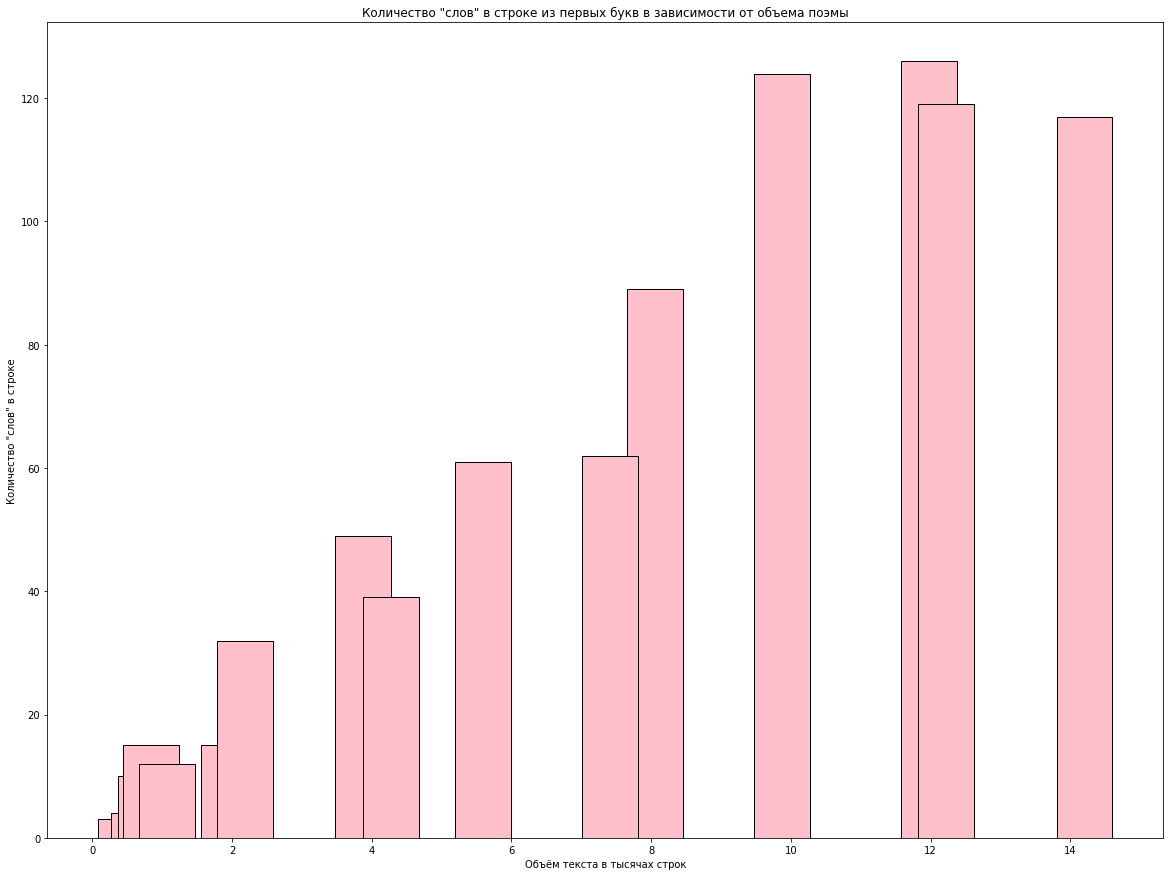

In [307]:
import matplotlib.pyplot as plt
%matplotlib inline
dict_help = {}
X = [0.482, 0.667, 0.765, 0.840, 1.959, 1.070, 4.097, 3.880, 8.058, 7.413, 4.279, 11.981, 12.215, 14.202, 5.591, 9.877, 2.191]
Y = [3, 4, 10, 15, 15, 12, 39, 49, 89, 62, 39, 126, 119, 117, 61, 124, 32]
plt.figure(figsize=(20, 15))
plt.bar(X, Y, color='pink', edgecolor='black')
plt.title('Количество "слов" в строке из первых букв в зависимости от объема поэмы')
plt.ylabel('Количество "слов" в строке')
plt.xlabel('Объём текста в тысячах строк')
plt.show()

Таблица со всеми данными

In [344]:
import pandas as pd
all_info_list = [{'N':0, 'название':'Вергилий. Георгики','количество символов в строке':2191,'кол-во слов по 4':25,'кол-во слов по 5':6,'кол-во слов по 6':1, 'частота':32/14991}, {'N':1,'название':'Вергилий. Буколики','количество символов в строке':840,'кол-во слов по 4':13,'кол-во слов по 5':1,'кол-во слов по 6':1, 'частота':15/5735}, {'N':2,'название':'Вергилий. Энеида','количество символов в строке':9877,'кол-во слов по 4':100,'кол-во слов по 5':21,'кол-во слов по 6':3, 'частота':124/67115}, {'N':3,'название':'Валерий Флак. Аргонавтика','количество символов в строке':5591,'кол-во слов по 4':52,'кол-во слов по 5':8,'кол-во слов по 6':1, 'частота':61/37203}, {'N':4,'название':'Стаций. Фиваида','количество символов в строке':14202,'кол-во слов по 4':117,'кол-во слов по 5':14,'кол-во слов по 6':4, 'частота':135/91031}, {'N':5,'название':'Силий Италик. Пуника','количество символов в строке':12215,'кол-во слов по 4':93,'кол-во слов по 5':22,'кол-во слов по 6':4, 'частота':119/76394}, {'N':6,'название':'Персий','количество символов в строке':667,'кол-во слов по 4':3,'кол-во слов по 5':1,'кол-во слов по 6':0, 'частота':4/4516}, {'N':7,'название':'Овидий. Метаморфозы','количество символов в строке':11981,'кол-во слов по 4':102,'кол-во слов по 5':21,'кол-во слов по 6':3, 'частота':126/77965}, {'N':8,'название':'Манилий. Астрономика','количество символов в строке':4279,'кол-во слов по 4':32,'кол-во слов по 5':4,'кол-во слов по 6':3, 'частота':39/27487}, {'N':9,'название':'Лукреций. О природе вещей','количество символов в строке':7413,'кол-во слов по 4':49,'кол-во слов по 5':12,'кол-во слов по 6':1, 'частота':62/49013}, {'N':10,'название':'Лукан. Фарсалия','количество символов в строке':8058,'кол-во слов по 4':68,'кол-во слов по 5':19,'кол-во слов по 6':2, 'частота':89/51010}, {'N':11,'название':'Ювенал','количество символов в строке':3880,'кол-во слов по 4':42,'кол-во слов по 5':7,'кол-во слов по 6':0, 'частота':49/25046}, {'N':12,'название':'Гораций','количество символов в строке':4097,'кол-во слов по 4':32,'кол-во слов по 5':7,'кол-во слов по 6':0, 'частота':39/27206}, {'N':13,'название':'Гомер','количество символов в строке':1070,'кол-во слов по 4':11,'кол-во слов по 5':1,'кол-во слов по 6':0, 'частота':12/6611}, {'N':14,'название':'Катулл','количество символов в строке':482,'кол-во слов по 4':3,'кол-во слов по 5':0,'кол-во слов по 6':0, 'частота':3/2919}, {'N':15,'название':'Кальпурний','количество символов в строке':765,'кол-во слов по 4':10,'кол-во слов по 5':0,'кол-во слов по 6':0, 'частота':10/4771}, {'N':16,'название':'Вергилий. Добавления','количество символов в строке':1959,'кол-во слов по 4':13,'кол-во слов по 5':2,'кол-во слов по 6':0, 'частота':15/12560}]
df = pd.DataFrame(all_info_list)
df

,N,название,количество символов в строке,кол-во слов по 4,кол-во слов по 5,кол-во слов по 6,частота
0,0,Вергилий. Георгики,2191,25,6,1,0.002135
1,1,Вергилий. Буколики,840,13,1,1,0.002616
2,2,Вергилий. Энеида,9877,100,21,3,0.001848
3,3,Валерий Флак. Аргонавтика,5591,52,8,1,0.001640
4,4,Стаций. Фиваида,14202,117,14,4,0.001483
5,5,Силий Италик. Пуника,12215,93,22,4,0.001558
6,6,Персий,667,3,1,0,0.000886
7,7,Овидий. Метаморфозы,11981,102,21,3,0.001616
8,8,Манилий. Астрономика,4279,32,4,3,0.001419
9,9,Лукреций. О природе вещей,7413,49,12,1,0.001265


График. Распределение по произведениям.

Text(0, 0.5, 'Условная частота "акрослов"')

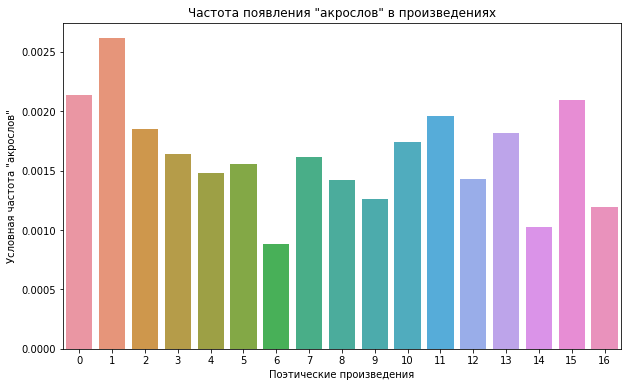

In [349]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="N", y="частота", data=df)
plt.title('Частота появления "акрослов" в произведениях')
plt.xlabel('Поэтические произведения')
plt.ylabel('Условная частота "акрослов"')